<a href="https://colab.research.google.com/github/priya-bai-s3/Data-Science-Projects/blob/main/DM_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab Exercise 2**

In [ ]:
#importing the neceessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

In [ ]:
#loading the data
body_fat=pd.read_csv('/content/BodyFat.csv')
body_fat.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


**Dimensionality reduction** is a technique that reduces the number of features in a dataset while retaining as much of the important information as possible. There are a number of techniques used for dimensionality reduction. A few major techniques among them are:


*   Missing Value Ratio
*   Low Variance Filter
*High Correlation Filter
*Random Forest
*Backward Feature Elimination
*Forward Feature Selection
*Factor Analysis
*Principal Component Analysis(PCA)
*Independent Component Analysis(ICA), etc.



## 1. Missing value Ratio
in this technique, we look for missing values and see if the missing values are to be imputed or the whole variable to be dropped if in case it is the case that a large portion of the said variable is missing. We do this by setting a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop that variable.

In [ ]:
#creating a copy
df1 = body_fat.copy(deep = True)
#checking the percentage of missing values in each variable
df1.isnull().sum()/len(df1)*100

BodyFat     0.0
Original    0.0
Sex         0.0
Age         0.0
Weight      0.0
Height      0.0
Neck        0.0
Chest       0.0
Abdomen     0.0
Hip         0.0
Thigh       0.0
Knee        0.0
Ankle       0.0
Biceps      0.0
Forearm     0.0
Wrist       0.0
dtype: float64

it is clearly seen that there are no missing values at all in the dataset. So we cannot perform data reduction using the missing value ratio technique.

## 2. Low Variance Filter
This method is about variables that has zero variance, that is, in case a variable contains the same value. Here, we calculate the variance of each variable in the dataset. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this is that variables with a low variance will not affect the target variable.

In [ ]:
#creating a copy
df2 = body_fat.copy(deep = True)
#calculating the variance of all the numerical variables.
df2.var()

<ipython-input-5-63eafed2008d>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.var()


BodyFat     56.281881
Age        240.253063
Weight     239.146631
Height       0.009674
Neck        14.729539
Chest      119.501797
Abdomen    214.702454
Hip         47.541489
Thigh       38.367410
Knee         7.664055
Ankle        3.170227
Biceps      15.561786
Forearm      9.955955
Wrist        2.503645
dtype: float64

As the above output shows, the variance of the variables Height, Knee, Wrist, Forearm and Ankle are very less as compared to the other variables. So we can safely drop these columns.

In [ ]:
#dropping the colummns with variance less than 10
df2.drop(['Height','Knee','Ankle','Forearm','Wrist'],axis = 1,inplace = True)
df2.head()

,BodyFat,Original,Sex,Age,Weight,Neck,Chest,Abdomen,Hip,Thigh,Biceps
0,12.3,Y,M,23,69.97,36.2,93.1,85.2,94.5,59.0,32.0
1,6.1,Y,M,22,78.59,38.5,93.6,83.0,98.7,58.7,30.5
2,25.3,Y,M,22,69.85,34.0,95.8,87.9,99.2,59.6,28.8
3,10.4,Y,M,26,83.80,37.4,101.8,86.4,101.2,60.1,32.4
4,28.7,Y,M,24,83.58,34.4,97.3,100.0,101.9,63.2,32.2


Thus, the variables with variance less than 10 are removed from the dataset.

## 3. High Correlation Filter
High correlation between two variables means they have similar trends and are likely to carry similar information. We now calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind). With regarding to dropping one among the two variables, we should keep those variables which show a decent or high correlation with the target variable according to the problem statement.

In [ ]:
#creating a copy
df3 = body_fat.copy(deep = True)
#calculating the correlation between the variables
df3.corr()

<ipython-input-7-c3551cc57d81>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
BodyFat,1.000000,0.015808,0.345822,-0.150693,0.121790,0.310410,0.357465,0.588482,0.331031,0.367168,0.182745,0.258221,0.106236,0.089182
Age,0.015808,1.000000,0.519842,0.372990,0.685648,0.622099,0.686124,0.141997,0.416740,0.406727,0.334627,0.534853,0.605983,0.687237
Weight,0.345822,0.519842,1.000000,0.589737,0.889274,0.908069,0.932298,0.805107,0.911007,0.857480,0.734550,0.887622,0.835529,0.852882
Height,-0.150693,0.372990,0.589737,1.000000,0.591184,0.493097,0.500683,0.294508,0.456867,0.486657,0.461879,0.500889,0.567114,0.587256
Neck,0.121790,0.685648,0.889274,0.591184,1.000000,0.878798,0.905187,0.550018,0.814819,0.718648,0.646243,0.864028,0.881829,0.899204
Chest,0.310410,0.622099,0.908069,0.493097,0.878798,1.000000,0.923944,0.652564,0.816111,0.730508,0.618492,0.840143,0.816486,0.818179
Abdomen,0.357465,0.686124,0.932298,0.500683,0.905187,0.923944,1.000000,0.676211,0.852196,0.772372,0.640534,0.859768,0.834764,0.856029
Hip,0.588482,0.141997,0.805107,0.294508,0.550018,0.652564,0.676211,1.000000,0.782589,0.772544,0.603796,0.653867,0.517417,0.533924
Thigh,0.331031,0.416740,0.911007,0.456867,0.814819,0.816111,0.852196,0.782589,1.000000,0.824800,0.697138,0.859831,0.795441,0.785533
Knee,0.367168,0.406727,0.857480,0.486657,0.718648,0.730508,0.772372,0.772544,0.824800,1.000000,0.711768,0.754541,0.712765,0.738605


Generally, if the correlation between a pair of variables is greater than 0.9, we should seriously consider dropping one of those variables.

Here, the correlation between few of the variables are greater than the said threshold 0.9. Here, the variables Weight and Abdomen can be dropped.

In [ ]:
#dropping the colummns with correlation greater than 0.9
df3.drop(['Weight','Abdomen'],axis = 1,inplace = True)
df3.head()

,BodyFat,Original,Sex,Age,Height,Neck,Chest,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,1.72,36.2,93.1,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,1.84,38.5,93.6,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,1.68,34.0,95.8,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,1.84,37.4,101.8,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,1.81,34.4,97.3,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Now, the variables having correlation with other variables more than 0.9 are removed from the dataset.

## 4. Random Forest
Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features. Random forest takes only numeric inputs. This graph can be used to hand pick the top-most features to reduce the dimensionality in our dataset.

In [ ]:
#creating a copy
df4 = body_fat.copy(deep = True)
from sklearn.ensemble import RandomForestRegressor
df4=df4.drop(['Original', 'Sex'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df4=pd.get_dummies(df4)
model.fit(df4,df4.BodyFat)

RandomForestRegressor(max_depth=10, random_state=1)

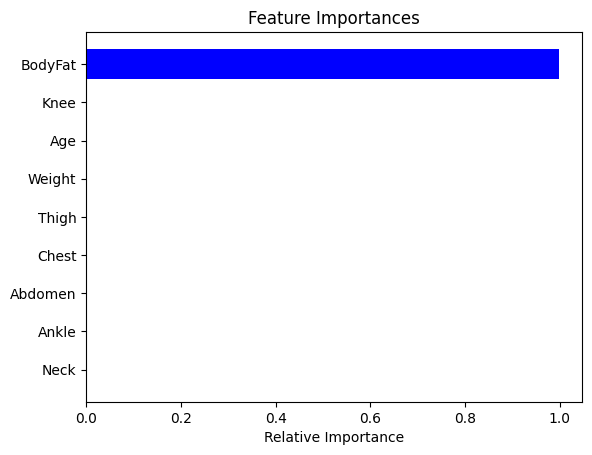

In [ ]:
features = df4.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 5. Principal Component Analysis
PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components

In [ ]:
#creating a copy
df5 = body_fat.copy(deep = True)
#dropping character variables
df5=df5.drop(['Original', 'Sex'], axis=1)

The first step is rescaling the values in the same scale. that is **Standardization**.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df5)
scaled_data = scaler.transform(df5)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
#transforming into first two principal components
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(436, 14)

In [ ]:
x_pca.shape

(436, 2)

It is seen that 14 dimensions are reduced to just 2.

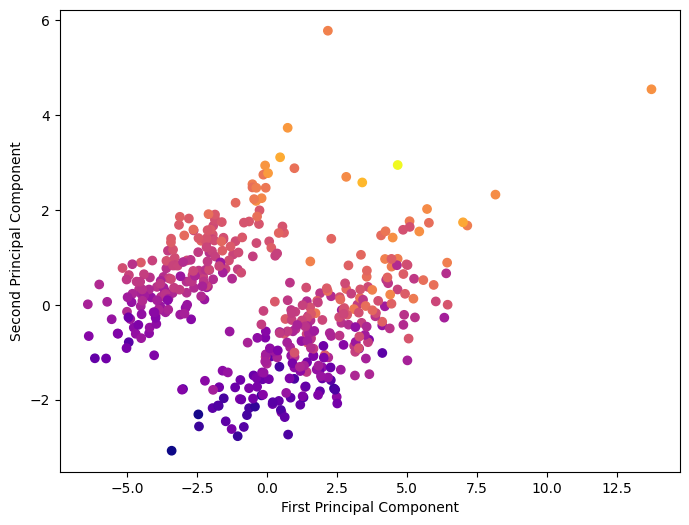

In [ ]:
#plotting the 2 dimensions
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df5['BodyFat'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

So we have reduced the dimensions into 2 using principal component Analysis.